# Importing Neccessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import the dataset

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Cleaning

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Finding the Relation ship between each variable with the Target Variable

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


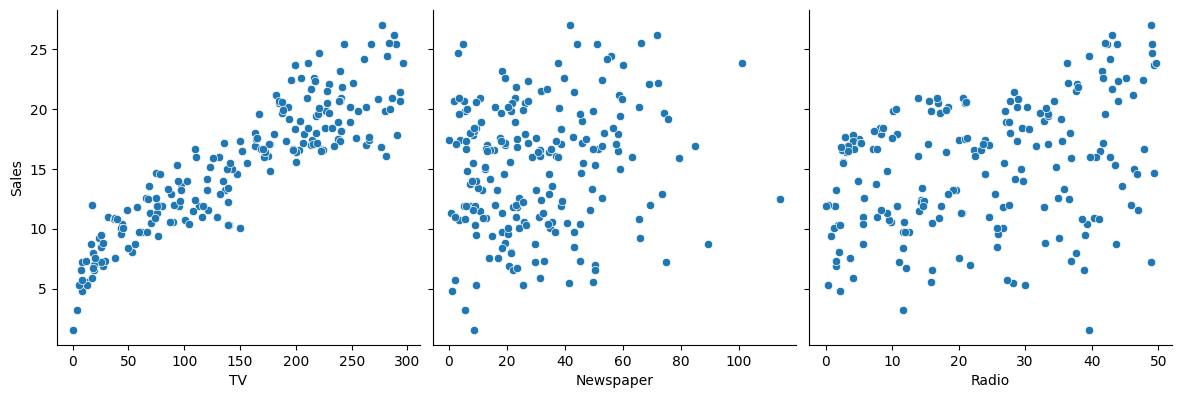

In [8]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
plt.show()

# Finding the correlation between Each Variable

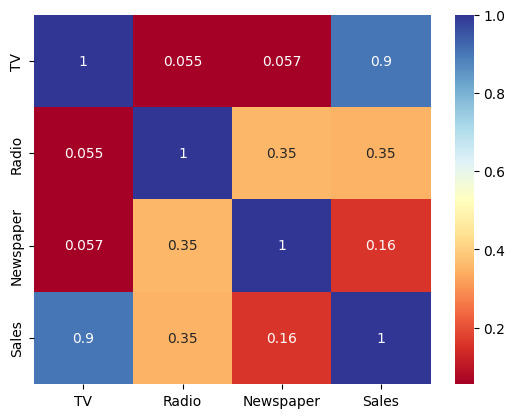

In [44]:
sns.heatmap(df.corr(), cmap="RdYlBu", annot = True)
plt.show()

# As the Correlation between TV Advertising and it's Sales is good and Highes we are going to proceed with that.

In [19]:
X = df['TV']
y = df['Sales']

# Train and test split of data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [23]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# importing the API for LINEAR_REGRESSION from STATSMODELS.

In [24]:
import statsmodels.api as sm

In [25]:
X_train_sm = sm.add_constant(X_train)

# In the Regression Equation for this data Y=Mx+c Y=Sales x=Advertising_sales 

In [26]:
lin=sm.OLS(y_train, X_train_sm).fit()

In [28]:
lin.params

const    6.948683
TV       0.054546
dtype: float64

# Slope- 0.054546
# Constant -6.948683

In [29]:
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        18:37:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# the line of best fit

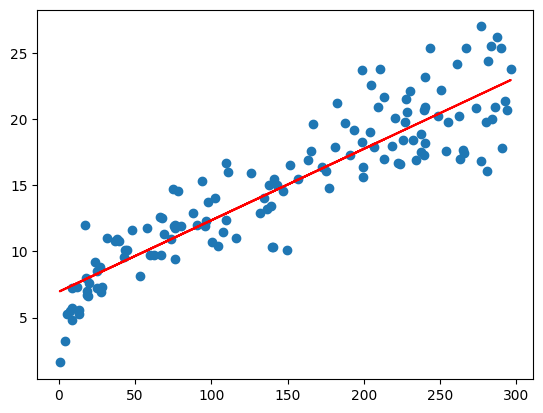

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [31]:
y_train_pred = lin.predict(X_train_sm)
res = (y_train - y_train_pred)

# Normal plot to show the Prediction accuracy

C:\Users\USER\AppData\Local\Temp\ipykernel_13336\4222823764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,kde=1)


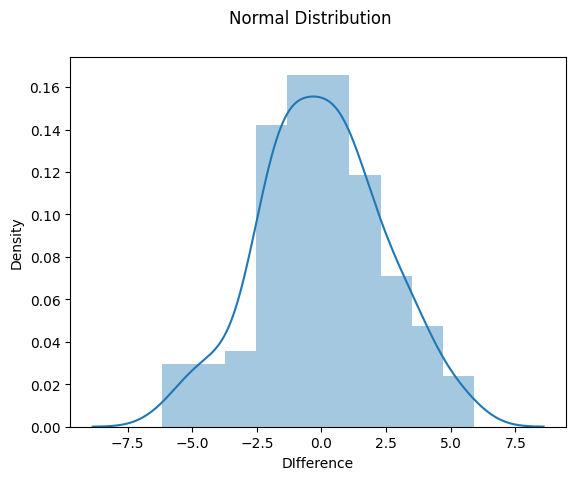

In [43]:
fig=plt.figure()
sns.distplot(res,kde=1)
fig.suptitle("Normal Distribution")
plt.xlabel("DIfference")
plt.show()

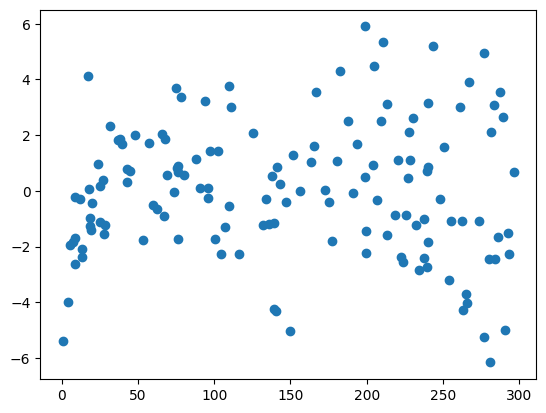

In [33]:
plt.scatter(X_train,res)
plt.show()

# Applying the regression for the testing Dataset

In [34]:
X_test_sm = sm.add_constant(X_test)


In [35]:
y_pred = lin.predict(X_test_sm)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [38]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245659

# Accuracy-79.21031601245659

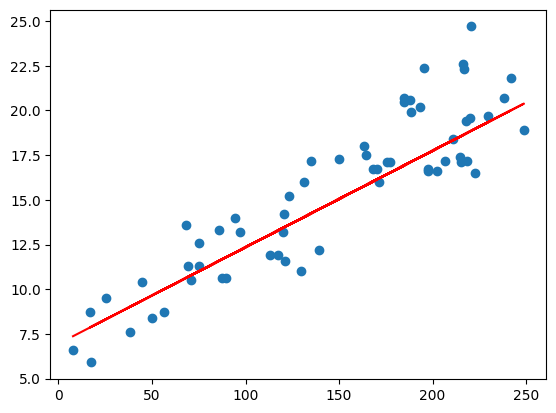

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()